# Natural language processing

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории. 

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
from nltk import tokenize
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

[nltk_data] Downloading package stopwords to /Users/dk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [186]:
#выгрузка датасета
with open ("../datasets/toxic.csv") as file:
    data_nlp = pd.read_csv(file)

data_nlp.head(10)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
5             0        0       0       0              0  
6             1        1       0       1              0  
7             0        0       0       0              0  
8             0        0       0       0              0  
9             0        0       0       0              0

In [187]:
#добавление нового столбца non_toxic
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_nlp['non_toxic'] = data_nlp[cols].sum(axis=1)
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          0  
1       0             0        0       0       0              0          0  
2       0             0        0       0       0              0          0  
3       0             0        0       0       0              0          0  
4       0             0        0       0       0              0          0  
5       0             0        0       0       0              0          0  
6       1             1        1       0       1              0          4  
7       0             0        0       0       0              0          0  
8       0             0        0       0       0              0          0  
9       0             0        0       0       0              0          0  
10      0             0        0       0       0              0          0  
11      0             0        0       0       0              0          0  
12      1             0        0       0       0              0          1  
13      0             0        0       0       0              0          0  
14      0             0        0       0       0              0          0

In [188]:
#преобразование столбца non_toxic в необходимый для расчётов вид
data_nlp['non_toxic'] = data_nlp['non_toxic'].apply(lambda x: 1 if x == 0 else 0)


In [189]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

<Axes: xlabel='Критерии', ylabel='Количество комментариев'>

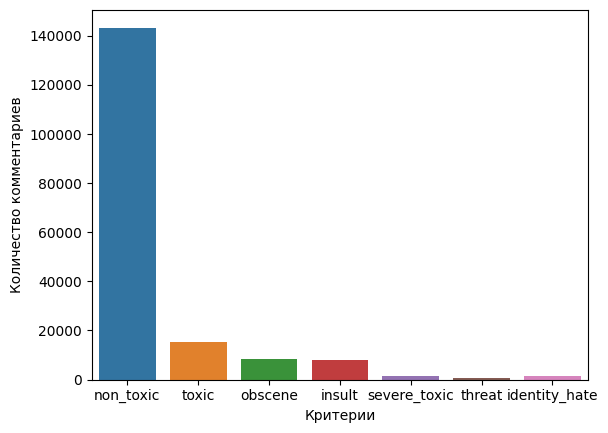

In [190]:
#построение графика
d_nlp = {"Критерии": ['non_toxic', 'toxic', 'obscene', 'insult', 'severe_toxic', 'threat', 'identity_hate'],
        "Количество комментариев": [data_nlp['non_toxic'].sum(), data_nlp['toxic'].sum(), data_nlp['obscene'].sum(), data_nlp['insult'].sum(), data_nlp['severe_toxic'].sum(), data_nlp['threat'].sum(), data_nlp['identity_hate'].sum()]
}
df_nlp = pd.DataFrame(d_nlp)
sns.barplot(data = df_nlp, x = "Критерии", y = "Количество комментариев")

In [191]:
#вывод точного количества комметариев для каждого критерия
df_nlp

Критерии  Количество комментариев
0      non_toxic                   143346
1          toxic                    15294
2        obscene                     8449
3         insult                     7877
4   severe_toxic                     1595
5         threat                      478
6  identity_hate                     1405

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [192]:
#приведение значений в столбце comment_text к нижнему регистру
data_nlp['comment_text'] = data_nlp['comment_text'].apply(lambda x: x.lower())

In [193]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  explanation\nwhy the edits made under my usern...   
1   000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2   000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3   0001b41b1c6bb37e  "\nmore\ni can't make any real suggestions on ...   
4   0001d958c54c6e35  you, sir, are my hero. any chance you remember...   
5   00025465d4725e87  "\n\ncongratulations from me as well, use the ...   
6   0002bcb3da6cb337       cocksucker before you piss around on my work   
7   00031b1e95af7921  your vandalism to the matt shirvington article...   
8   00037261f536c51d  sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nfair use rationale for image:wonju.jpg\n\nt...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  hey... what is it..\n@ | talk .\nwhat is it......   
13  0006f16e4e9f292e  before you start throwing accusations and warn...   
14  00070ef96486d6f9  oh, and the girl above started her arguments w...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

In [194]:
#токенизация значений в столбце comment_text
tokens = tokenize.WordPunctTokenizer()
data_nlp['comment_text'] = data_nlp['comment_text'].apply(lambda x: tokens.tokenize(x))

In [195]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  [explanation, why, the, edits, made, under, my...   
1   000103f0d9cfb60f  [d, ', aww, !, he, matches, this, background, ...   
2   000113f07ec002fd  [hey, man, ,, i, ', m, really, not, trying, to...   
3   0001b41b1c6bb37e  [", more, i, can, ', t, make, any, real, sugge...   
4   0001d958c54c6e35  [you, ,, sir, ,, are, my, hero, ., any, chance...   
5   00025465d4725e87  [", congratulations, from, me, as, well, ,, us...   
6   0002bcb3da6cb337  [cocksucker, before, you, piss, around, on, my...   
7   00031b1e95af7921  [your, vandalism, to, the, matt, shirvington, ...   
8   00037261f536c51d  [sorry, if, the, word, ', nonsense, ', was, of...   
9   00040093b2687caa  [alignment, on, this, subject, and, which, are...   
10  0005300084f90edc  [", fair, use, rationale, for, image, :, wonju...   
11  00054a5e18b50dd4  [bbq, be, a, man, and, lets, discuss, it, -, m...   
12  0005c987bdfc9d4b  [hey, ..., what, is, it, .., @, |, talk, ., wh...   
13  0006f16e4e9f292e  [before, you, start, throwing, accusations, an...   
14  00070ef96486d6f9  [oh, ,, and, the, girl, above, started, her, a...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

In [196]:
#удаление слов не являющихся английскими
lemmatizer = WordNetLemmatizer()
def delete_no_english_word(x):
    new_list = []
    for i in x:
        if lemmatizer.lemmatize(i): new_list.append(i)
    return new_list
data_nlp['comment_text'] = data_nlp['comment_text'].apply(delete_no_english_word)

In [197]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  [explanation, why, the, edits, made, under, my...   
1   000103f0d9cfb60f  [d, ', aww, !, he, matches, this, background, ...   
2   000113f07ec002fd  [hey, man, ,, i, ', m, really, not, trying, to...   
3   0001b41b1c6bb37e  [", more, i, can, ', t, make, any, real, sugge...   
4   0001d958c54c6e35  [you, ,, sir, ,, are, my, hero, ., any, chance...   
5   00025465d4725e87  [", congratulations, from, me, as, well, ,, us...   
6   0002bcb3da6cb337  [cocksucker, before, you, piss, around, on, my...   
7   00031b1e95af7921  [your, vandalism, to, the, matt, shirvington, ...   
8   00037261f536c51d  [sorry, if, the, word, ', nonsense, ', was, of...   
9   00040093b2687caa  [alignment, on, this, subject, and, which, are...   
10  0005300084f90edc  [", fair, use, rationale, for, image, :, wonju...   
11  00054a5e18b50dd4  [bbq, be, a, man, and, lets, discuss, it, -, m...   
12  0005c987bdfc9d4b  [hey, ..., what, is, it, .., @, |, talk, ., wh...   
13  0006f16e4e9f292e  [before, you, start, throwing, accusations, an...   
14  00070ef96486d6f9  [oh, ,, and, the, girl, above, started, her, a...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

In [198]:
#удаление из токенов цифр
def delete_digit(x):
    new_list = []
    for i in x:
        if not i.isdigit(): new_list.append(i)
    return new_list

data_nlp['comment_text'] = data_nlp['comment_text'].apply(delete_digit)

In [199]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  [explanation, why, the, edits, made, under, my...   
1   000103f0d9cfb60f  [d, ', aww, !, he, matches, this, background, ...   
2   000113f07ec002fd  [hey, man, ,, i, ', m, really, not, trying, to...   
3   0001b41b1c6bb37e  [", more, i, can, ', t, make, any, real, sugge...   
4   0001d958c54c6e35  [you, ,, sir, ,, are, my, hero, ., any, chance...   
5   00025465d4725e87  [", congratulations, from, me, as, well, ,, us...   
6   0002bcb3da6cb337  [cocksucker, before, you, piss, around, on, my...   
7   00031b1e95af7921  [your, vandalism, to, the, matt, shirvington, ...   
8   00037261f536c51d  [sorry, if, the, word, ', nonsense, ', was, of...   
9   00040093b2687caa  [alignment, on, this, subject, and, which, are...   
10  0005300084f90edc  [", fair, use, rationale, for, image, :, wonju...   
11  00054a5e18b50dd4  [bbq, be, a, man, and, lets, discuss, it, -, m...   
12  0005c987bdfc9d4b  [hey, ..., what, is, it, .., @, |, talk, ., wh...   
13  0006f16e4e9f292e  [before, you, start, throwing, accusations, an...   
14  00070ef96486d6f9  [oh, ,, and, the, girl, above, started, her, a...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

In [200]:
#удаление из токенов знаков препинания
def delete_punct(x):
    new_list = []
    for i in x:
        if i not in punctuation: new_list.append(i)
    return new_list

data_nlp['comment_text'] = data_nlp['comment_text'].apply(delete_punct)

In [201]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  [explanation, why, the, edits, made, under, my...   
1   000103f0d9cfb60f  [d, aww, he, matches, this, background, colour...   
2   000113f07ec002fd  [hey, man, i, m, really, not, trying, to, edit...   
3   0001b41b1c6bb37e  [more, i, can, t, make, any, real, suggestions...   
4   0001d958c54c6e35  [you, sir, are, my, hero, any, chance, you, re...   
5   00025465d4725e87  [congratulations, from, me, as, well, use, the...   
6   0002bcb3da6cb337  [cocksucker, before, you, piss, around, on, my...   
7   00031b1e95af7921  [your, vandalism, to, the, matt, shirvington, ...   
8   00037261f536c51d  [sorry, if, the, word, nonsense, was, offensiv...   
9   00040093b2687caa  [alignment, on, this, subject, and, which, are...   
10  0005300084f90edc  [fair, use, rationale, for, image, wonju, jpg,...   
11  00054a5e18b50dd4  [bbq, be, a, man, and, lets, discuss, it, mayb...   
12  0005c987bdfc9d4b  [hey, ..., what, is, it, .., talk, what, is, i...   
13  0006f16e4e9f292e  [before, you, start, throwing, accusations, an...   
14  00070ef96486d6f9  [oh, and, the, girl, above, started, her, argu...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

In [202]:
#удаление из токенов стоп-слов
def delete_stop_word(x):
    english_stopword = stopwords.words('english')
    new_list = []
    for i in x:
        if i not in english_stopword: new_list.append(i)
    return new_list

data_nlp['comment_text'] = data_nlp['comment_text'].apply(delete_stop_word)

In [203]:
data_nlp.head(15)

id                                       comment_text  \
0   0000997932d777bf  [explanation, edits, made, username, hardcore,...   
1   000103f0d9cfb60f  [aww, matches, background, colour, seemingly, ...   
2   000113f07ec002fd  [hey, man, really, trying, edit, war, guy, con...   
3   0001b41b1c6bb37e  [make, real, suggestions, improvement, wondere...   
4   0001d958c54c6e35                [sir, hero, chance, remember, page]   
5   00025465d4725e87  [congratulations, well, use, tools, well, ·, t...   
6   0002bcb3da6cb337                   [cocksucker, piss, around, work]   
7   00031b1e95af7921  [vandalism, matt, shirvington, article, revert...   
8   00037261f536c51d  [sorry, word, nonsense, offensive, anyway, int...   
9   00040093b2687caa          [alignment, subject, contrary, dulithgow]   
10  0005300084f90edc  [fair, use, rationale, image, wonju, jpg, than...   
11  00054a5e18b50dd4            [bbq, man, lets, discuss, maybe, phone]   
12  0005c987bdfc9d4b  [hey, ..., .., talk, ..., exclusive, group, wp...   
13  0006f16e4e9f292e  [start, throwing, accusations, warnings, lets,...   
14  00070ef96486d6f9  [oh, girl, started, arguments, stuck, nose, be...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  non_toxic  
0       0             0        0       0       0              0          1  
1       0             0        0       0       0              0          1  
2       0             0        0       0       0              0          1  
3       0             0        0       0       0              0          1  
4       0             0        0       0       0              0          1  
5       0             0        0       0       0              0          1  
6       1             1        1       0       1              0          0  
7       0             0        0       0       0              0          1  
8       0             0        0       0       0              0          1  
9       0             0        0       0       0              0          1  
10      0             0        0       0       0              0          1  
11      0             0        0       0       0              0          1  
12      1             0        0       0       0              0          0  
13      0             0        0       0       0              0          1  
14      0             0        0       0       0              0          1

In [204]:
#сортировка по id, поиск длины эл-ов в токене
data_nlp_sort_id = data_nlp[data_nlp['id'] == '000103f0d9cfb60f']

def len_token(x):
    l = 0
    for i in x:
        l += 1
    return l

data_nlp_sort_id['len_comment_text'] = data_nlp_sort_id['comment_text'].apply(len_token)

/var/folders/4r/76tbc5l13sl1s06rkpsq4k740000gn/T/ipykernel_66189/116545551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nlp_sort_id['len_comment_text'] = data_nlp_sort_id['comment_text'].apply(len_token)


In [205]:
data_nlp_sort_id['len_comment_text']

1    10
Name: len_comment_text, dtype: int64

## Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

In [206]:
#создание копии датасета, выделение целевой переменной, разделение на тестовую и тренировочную выборки
data_nlp_copy = data_nlp.copy()
data_nlp_copy['comment_text'] = data_nlp_copy['comment_text'].apply(lambda x: ' '.join(map(str, x)))
y = data_nlp_copy['non_toxic'].values
data_nlp_copy.drop(['non_toxic', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(data_nlp_copy, y, random_state=21, test_size=0.3, shuffle=True)

In [207]:
#преобразование с помощью TF-IDF
vectorizer = TfidfVectorizer(min_df = 3000)
X_train_review_tfidf = vectorizer.fit_transform(X_train['comment_text'])

In [208]:
#вывод размерности тренировочной выборки после преобразования
X_train_review_tfidf.shape

(111699, 131)

## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [209]:
#преобразование с помощью TF-IDF для тестовой выборки
X_test_review_tfidf = vectorizer.transform(X_test['comment_text'])

In [210]:
#обучение модели 
clf_nlp = RidgeClassifier().fit(X_train_review_tfidf, y_train)

In [211]:
#получение значения ROC-AUC
roc_auc_score(y_test, clf_nlp.decision_function(X_test_review_tfidf))

0.7904325115541242

## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

In [214]:
from profanity import profanity
import numpy as np

# Признак - максимальное количество ! рядом 
def feature1(arr):
    max = 0
    for w in arr:
        j = 0
        while j < len(w) and w[j] == '!':
            j = j + 1
        if j > max:
            max = j
    return max 

# Признак - количество слов состоящих только из !
def feature2(arr): 
    cnt = 0
    for w in arr:
        j = 0
        while j < len(w) and w[j] == '!':
            j = j + 1
        if j > 0:
            cnt = cnt + 1
    return cnt 

# Признак - количество матерных слов
def feature3(arr):
    cnt = 0
    for w in arr:
        if profanity.contains_profanity(w):
            cnt = cnt + 1
    return cnt 

# признак - количество уникальных слов
def feature4(arr):    
    return len(np.unique(arr))

data_nlp['f1'] = data_nlp.apply(lambda x: feature1(x['comment_text']), axis=1)
data_nlp['f2'] = data_nlp.apply(lambda x: feature2(x['comment_text']), axis=1)
data_nlp['f3'] = data_nlp.apply(lambda x: feature3(x['comment_text']), axis=1)
data_nlp['f4'] = data_nlp.apply(lambda x: feature4(x['comment_text']), axis=1)

id                                       comment_text  \
59      002264ea4d5f2887  [believe, fat, artie, see, recent, appearence,...   
76      002f0e29c60807b1  [looking, looks, like, around, dick, talk, pag...   
151     005f59485fcddeb0  [sorry, puck, one, ever, said, dick, number, o...   
214     008a1e9c45de8138  [randroide, answers, "", next, step, "", guys,...   
231     009371b0ef213487  [burn, deck, guy, burn, deck, like, think, blr...   
...                  ...                                                ...   
159386  fccf0939631ab7c8  [stop, telling, lies, trying, promote, pro, zi...   
159449  fdce660ddcd6d7ca                             [think, gay, fag, !!!]   
159503  ff097b5e81d45244  ["", see, also, one, hitter, smoking, )"", ple...   
159535  ff7ef80ee62bbcf6  [thank, squiddy, still, think, get, reverted, ...   
159546  ffb47123b2d82762  [hey, listen, ever, !!!!, delete, edits, ever,...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
59          1             0        0       0       0              0   
76          0             0        0       0       0              0   
151         1             0        0       0       0              0   
214         0             0        0       0       0              0   
231         1             0        1       0       1              0   
...       ...           ...      ...     ...     ...            ...   
159386      1             0        0       0       0              0   
159449      1             0        0       0       0              1   
159503      0             0        0       0       0              0   
159535      0             0        0       0       0              0   
159546      1             0        0       0       1              0   

        non_toxic  f1  f2  f3   f4  
59              0   3   1   0   30  
76              1   2   1   1   18  
151             0   2   1   1   46  
214             1   1   1   0  218  
231             0   3   2   1   10  
...           ...  ..  ..  ..  ...  
159386          0   3   1   0   19  
159449          0   3   1   1    4  
159503          1   1   1   0   66  
159535          1   1   1   0    8  
159546          0   5   4   2   36  

[5304 rows x 13 columns]

In [237]:
import scipy.sparse as sp

data_nlp['f1'] = data_nlp['f1'] / data_nlp['f1'].max()
data_nlp['f2'] = data_nlp['f2'] / data_nlp['f2'].max()
data_nlp['f3'] = data_nlp['f3'] / data_nlp['f3'].max()
data_nlp['f4'] = data_nlp['f4'] / data_nlp['f4'].max()
data_nlp[data_nlp['f2'] > 0]

data_nlp_copy = data_nlp.copy()
data_nlp_copy['comment_text'] = data_nlp_copy['comment_text'].apply(lambda x: ' '.join(map(str, x)))
y = data_nlp_copy['non_toxic'].values
vectorizer = TfidfVectorizer(min_df = 3000)
X = vectorizer.fit_transform(data_nlp_copy['comment_text'])
X = sp.hstack([X, sp.csr_matrix(data_nlp_copy['f1'].values).T], 'csr')
X = sp.hstack([X, sp.csr_matrix(data_nlp_copy['f2'].values).T], 'csr')
X = sp.hstack([X, sp.csr_matrix(data_nlp_copy['f3'].values).T], 'csr')
X = sp.hstack([X, sp.csr_matrix(data_nlp_copy['f4'].values).T], 'csr')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3, shuffle=True)

clf_nlp = RidgeClassifier().fit(X_train, y_train)
roc_auc_score(y_test, clf_nlp.decision_function(X_test))

0.8179351936079